# Jupyter Notebook for SVC
Auto-generated notebook.


In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn import datasets
import os, sys, plotly.graph_objects as go
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from erudition.learning.helpers.plots.plotly_render import render, scatter

In [2]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

df=pd.DataFrame(X, columns=['sepal_length', 'sepal_width'])
df['iris_type'] = y

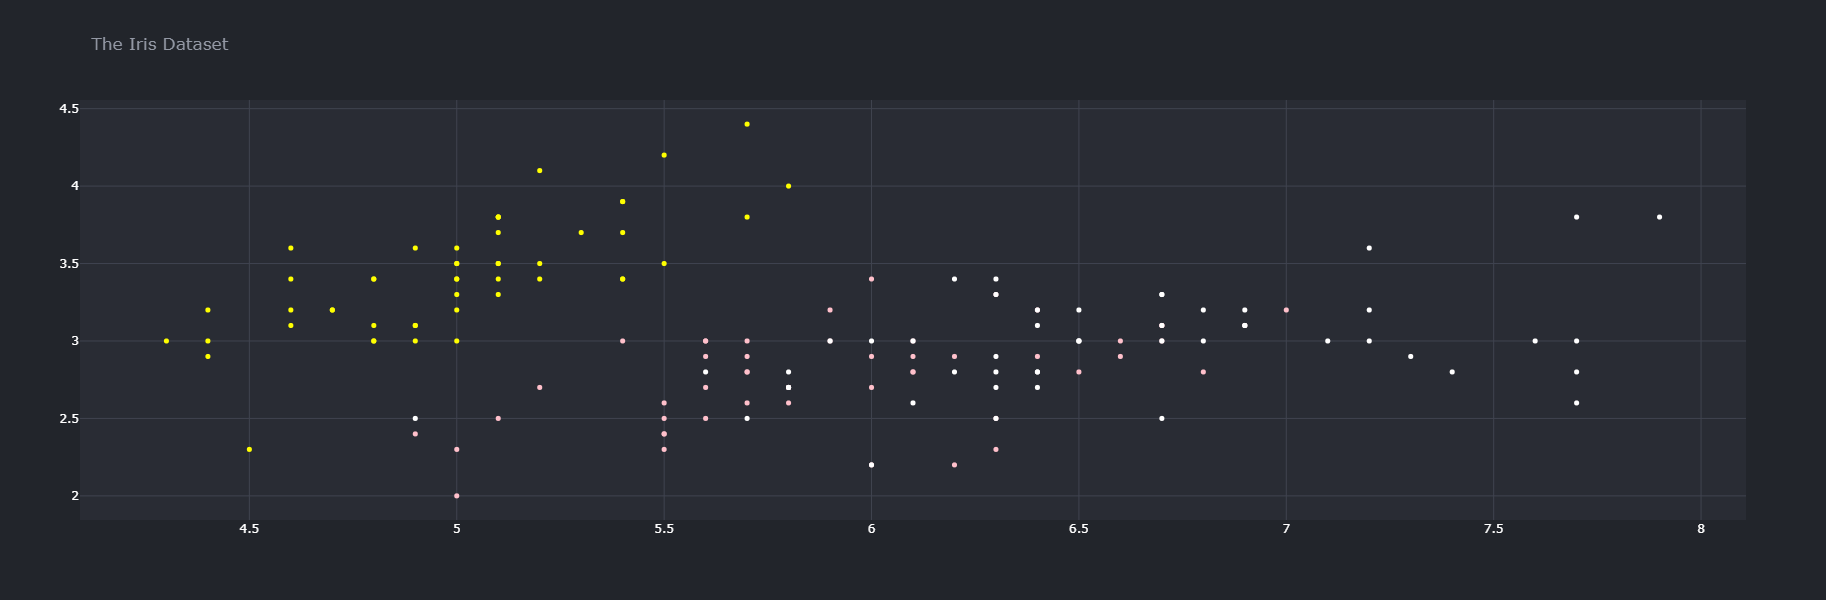

In [4]:
fig = go.Figure(data=[scatter(df.sepal_length, df.sepal_width, 'The Iris Dataset', mode='markers', size=5, opacity=1, color = [['yellow', 'pink', 'white'][a] for a in df.iris_type])])
render(fig, title='The Iris Dataset', height=600, width=600)

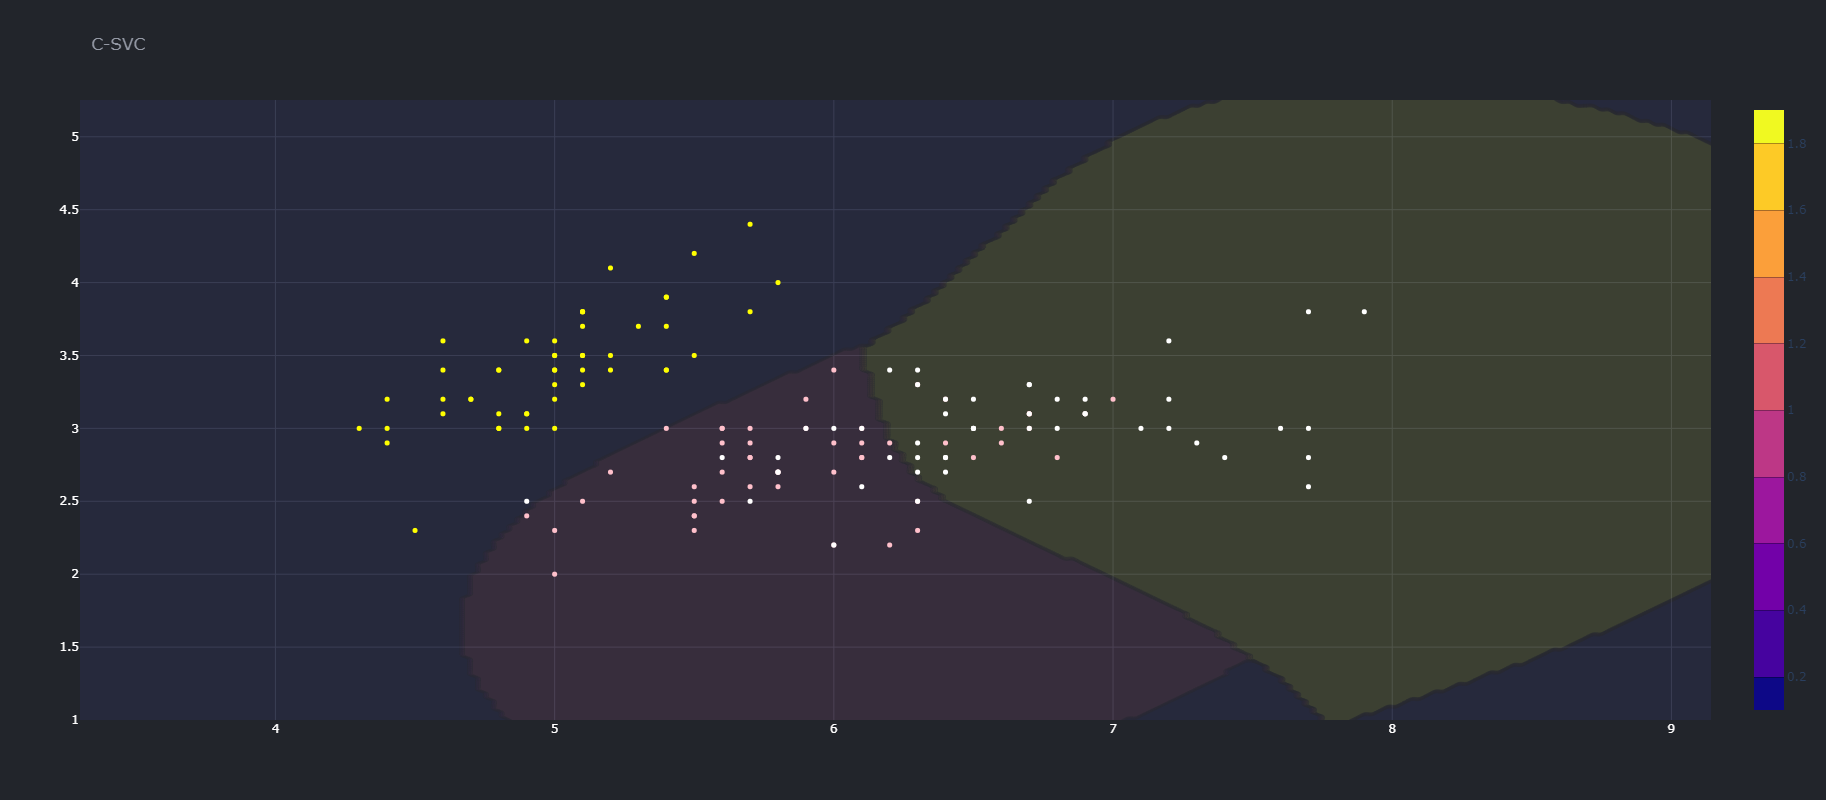

In [5]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

svc = SVC(C=10, gamma='auto').fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = go.Figure(data=[
    scatter(df.sepal_length, df.sepal_width, 'The Iris Dataset', mode='markers', size=5, opacity=1, color = [['yellow', 'pink', 'white'][a] for a in df.iris_type]),
    go.Contour(
        z=Z,
        x=np.linspace(x_min, x_max-1, Z.shape[0]),
        y=np.linspace(y_min, y_max+1, Z.shape[1]),
        #contours_coloring='lines',
        opacity=0.1,
        #line_width=2,
    )
    ])
render(fig, title='C-SVC', height=800, width=800)
